# Assignment: Running Your First Program


## Introduction 

This is the assignment for the 2nd week of the [Data Management and Visualization MOOC](https://www.coursera.org/learn/data-visualization) on [coursera](coursera.org). The purpose of this program is to serve as a first approach to exploratory analysis of the dataset and codebook chosen in the 1st week of the course, namely, the Mars Crater Survey Data available on the course page, and the variables:

* __LATITUDE_CIRCLE_IMAGE__–latitude from the derived center of a non-linear least-squares circle fit to the vertices selected to manually identify the crater rim (units are decimal degrees north);

* __DIAM_CIRCLE_IMAGE__–diameter from a non-linear least squares circle	 fit	 to	 the  vertices	 selected	 to	 manually	 identify	 the	 crater	 rim (units	are Km).

* __DEPTH_RIMFLOOR_TOPOG__–average elevation of each of the manually determined N points along (or inside) the crater rim(units are km)

    When doing exploratory analysis, it is often useful to include any unique identifiers that our observations might have, and in this dataset specifically we have the __CRATER_ID__ variable.
    
    __Technical sidenote__: this report was made using the [Jupyter Notebook web application](https://jupyter.org/) with the [iPython Kernel](http://ipython.org/). The reason I chose this particular set-up is because it is very similar to what I'm used to utilize in my daily data-analysis: R + rstudio + knittr. It is certainly a very streamlined and fast way to produce reports and analysis in varying degrees of sofistication. It is also certainly faster than an IDE setup (specially Spyder), which is somewhat restrictive on the presentation side of things, and I would have notable rework when translating my work to my blog.
    
    So let's get to it.
    
    
## Loading the dataset and preparing our variables


As noted in the introduction, this is the dataset made available on the course page. First, we load the whole dataset, and then we subset the variables of interest.

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot

data = pandas.read_csv('marscrater_pds.csv', low_memory = False)
data = data[['LATITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG']]

## Structure of our dataset

In [2]:
print(data.shape)

(384343, 3)


That is, there's 384343 (!) observations of 3 variables. We can check that the column names of our dataset really correspond to the subset we chose:

In [3]:
print(data.columns.values)

['LATITUDE_CIRCLE_IMAGE' 'DIAM_CIRCLE_IMAGE' 'DEPTH_RIMFLOOR_TOPOG']


The number of missing observations in each variable is:

In [4]:
print(data.isnull().sum())

LATITUDE_CIRCLE_IMAGE    0
DIAM_CIRCLE_IMAGE        0
DEPTH_RIMFLOOR_TOPOG     0
dtype: int64


Great! We have no missing observations of any of the variables in our dataset. That can be explained in part by the fact that both the __LATITUDE_CIRCLE_IMAGE__ and the __DIAM_CIRCLE_IMAGE__ are obtained by the regression method called Non-linear Least Squares (NLLS). For the __DEPTH_RIMFLOOR_TOPOG__ variable, I couldn't find any specifics on how it was obtained, although I guess it is estimated by optical instruments.

## Visualizing the values

We can tabulate the observations individually:

In [5]:
print("Frequency table of the variable LATITUDE_CIRCLE_IMAGE\n",data['LATITUDE_CIRCLE_IMAGE'].value_counts(sort=True))

Frequency table of the variable LATITUDE_CIRCLE_IMAGE
 -23.634    17
-2.572     16
-3.150     15
-22.340    15
-12.406    15
-17.317    15
-12.970    15
-19.724    14
-21.218    14
-25.794    14
-28.846    14
-10.130    14
-15.941    13
-3.156     13
-21.579    13
-17.352    13
-21.841    13
-25.820    13
-26.596    13
-9.262     13
-17.669    13
-24.741    13
-12.505    13
-20.381    13
-21.880    13
-16.999    13
-19.448    13
-18.087    13
-12.655    13
-12.262    13
           ..
 69.540     1
 10.420     1
-70.124     1
-49.441     1
 36.901     1
-62.060     1
 64.387     1
 52.732     1
-62.940     1
-67.224     1
-39.983     1
-48.566     1
-57.935     1
-8.618      1
 11.670     1
 52.107     1
 11.117     1
 29.303     1
-44.966     1
-66.565     1
-53.532     1
 68.637     1
 73.790     1
-60.685     1
-70.474     1
 12.762     1
-3.174      1
-41.091     1
-56.352     1
 48.541     1
Name: LATITUDE_CIRCLE_IMAGE, dtype: int64


In [14]:
print("Frequency table of the variable DIAM_CIRCLE_IMAGE\n",data['DIAM_CIRCLE_IMAGE'].value_counts(sort=True))

Frequency table of the variable DIAM_CIRCLE_IMAGE
 1.01      6298
1.02      6077
1.03      6035
1.04      5941
1.05      5771
1.06      5556
1.07      5454
1.08      5418
1.09      5197
1.10      5088
1.11      4884
1.12      4846
1.13      4687
1.15      4559
1.14      4457
1.16      4396
1.18      4265
1.17      4250
1.19      3996
1.20      3981
1.21      3899
1.22      3754
1.24      3697
1.23      3650
1.26      3524
1.25      3486
1.27      3428
1.28      3240
1.30      3145
1.00      3129
          ... 
94.81        1
93.81        1
88.56        1
87.81        1
87.06        1
81.56        1
80.06        1
75.31        1
74.81        1
73.56        1
123.31       1
134.81       1
42.63        1
139.06       1
45.38        1
78.52        1
41.38        1
36.63        1
36.23        1
276.56       1
261.31       1
236.06       1
222.31       1
198.81       1
181.31       1
179.06       1
150.81       1
147.31       1
145.56       1
81.74        1
Name: DIAM_CIRCLE_IMAGE, dtype: in

In [15]:
print("Frequency table of the variable DEPTH_RIMFLOOR_TOPOG\n",data['DEPTH_RIMFLOOR_TOPOG'].value_counts(sort=True))

Frequency table of the variable DEPTH_RIMFLOOR_TOPOG
 0.00    307529
0.07      2059
0.08      2047
0.09      2008
0.10      1999
0.11      1953
0.06      1895
0.12      1853
0.13      1763
0.05      1743
0.04      1644
0.14      1632
0.15      1627
0.16      1541
0.17      1435
0.18      1365
0.19      1363
0.03      1301
0.21      1247
0.20      1201
0.22      1189
0.23      1110
0.25      1091
0.24      1040
0.26      1021
0.27      1004
0.28       934
0.29       930
0.30       915
0.02       862
         ...  
4.75         1
2.76         1
4.01         1
4.95         1
2.95         1
3.47         1
2.69         1
2.79         1
2.94         1
2.87         1
2.73         1
2.90         1
2.97         1
3.31         1
2.82         1
2.83         1
2.84         1
3.10         1
3.08         1
3.60         1
2.48         1
2.57         1
2.78         1
3.11         1
3.03         1
3.13         1
2.58         1
2.63         1
3.80         1
3.64         1
Name: DEPTH_RIMFLOOR_TOPOG, dty

Note the ellipsis in all three tabulations. We have many, many diverse values of observations, so that pandas cannot efficiently tabulate all of them. It chooses to use the suspension points to keep things brief, but it is also an indication that we could choose a better way to describe our data, like in a histogram. Lets plot our variables in three histograms:

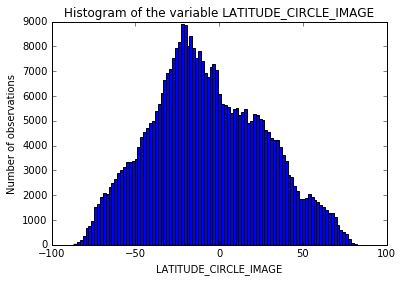

In [7]:
matplotlib.pyplot.hist(data['LATITUDE_CIRCLE_IMAGE'], bins = 100)
matplotlib.pyplot.xlabel("LATITUDE_CIRCLE_IMAGE")
matplotlib.pyplot.ylabel("Number of observations")
matplotlib.pyplot.title("Histogram of the variable LATITUDE_CIRCLE_IMAGE")
matplotlib.pyplot.show()

We can see the behavior of our data more clearly with the histogram. Note how there's a clearer visualization of our data, it's behavior. We can assert, for example:

* The data is unimodal;

* The data is, _to some extent_, symmetric around a value which is between 0 and -50 degrees north, the _mean_ of the latitude of the craters.

This histogram points towards a _normality_ of our data. We could execute an hypothesis test using the Shapiro-Wilk or Kolmogorov-Smirnov tests for adherence, or even a Q-Q plot with regards to a Normal distribution could at least point towards a qualitative decision whether our data follows the Normal distribution or not. We'll keep this to a second opportunity.

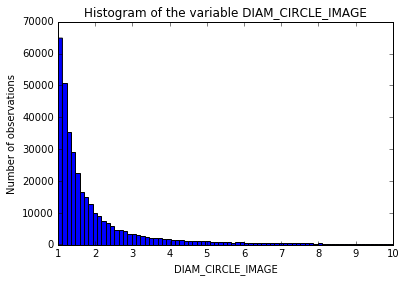

In [15]:
matplotlib.pyplot.hist(data['DIAM_CIRCLE_IMAGE'], bins = 10000)
matplotlib.pyplot.xlabel("DIAM_CIRCLE_IMAGE")
matplotlib.pyplot.ylabel("Number of observations")
matplotlib.pyplot.title("Histogram of the variable DIAM_CIRCLE_IMAGE")
matplotlib.pyplot.axis([1,10,0,70000])
matplotlib.pyplot.show()

The case of DIAM_CIRCLE_IMAGE is also interesting. This histogram suggests a power law distribution. Power laws appear in many diverse phenomena, on Earth or otherwise, and this was certainly a nice find on our exploratory investigation.

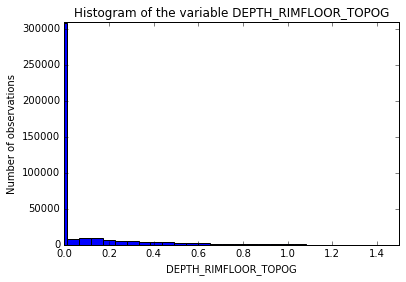

In [18]:
matplotlib.pyplot.hist(data['DEPTH_RIMFLOOR_TOPOG'], bins = 100)
matplotlib.pyplot.xlabel("DEPTH_RIMFLOOR_TOPOG")
matplotlib.pyplot.ylabel("Number of observations")
matplotlib.pyplot.title("Histogram of the variable DEPTH_RIMFLOOR_TOPOG")
matplotlib.pyplot.axis([0,1.5,0,310000])
matplotlib.pyplot.show()

Sadly, our DEPTH_RIMFLOOR_TOPOG has a distribution which is grossly skewed. Note how the frequency table above already told us this: there's 307529 observations with the value 0 for this variable.